<a href="https://colab.research.google.com/github/itsmepriyabrata/priyabrata_ai_python/blob/main/anomaly%20detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Autoencoder based anomaly detection

In [1]:
pip install tensorflow keras


11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/50
96/96 [==============================] - 4s 31ms/step - loss: 0.3539 - val_loss: 0.2398
Epoch 2/50
96/96 [==============================] - 2s 26ms/step - loss: 0.2141 - val_loss: 0.1909
Epoch 3/50
96/96 [==============================] - 2s 21ms/step - loss: 0.1807 - val_loss: 0.1703
Epoch 4/50
96/96 [==============================] - 1s 12ms/step - loss: 0.1640 - val_loss: 0.1569
Epoch 5/50
96/96 [==============================] - 1s 11ms/step - loss: 0.1524 - val_loss: 0.1475
Epoch 6/50
96/96 [==============================] - 1s 12ms/step - loss: 0.1436 - val_loss: 0.1397
Epoch 7/50
96/96 [==============================] - 1s 11ms/step - loss: 0.1359 - val_loss: 0.1326
Epoch 8/50
96/96 [==============================] - 1s 11ms/step - loss: 0.1292 - val_loss: 0.1263
Epoch 9/50
96/96 [==============================] - 1s 11ms/step - loss: 0.1234 - val_loss: 0.1212
Epoch 10/50
96/96 [=========================

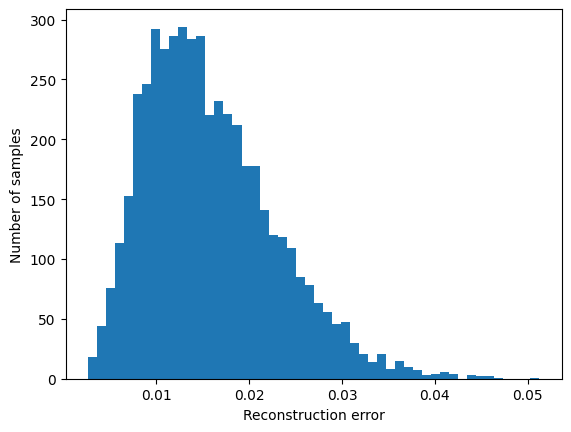

Number of anomalies detected: 243


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, Dense
from keras.optimizers import Adam

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

normal_data = x_train[y_train < 5]
anomalous_data = x_test[y_test >= 5]

input_dim = normal_data.shape[1]
encoding_dim = 32

input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation='relu')(input_layer)
decoder = Dense(input_dim, activation='sigmoid')(encoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)

autoencoder.compile(optimizer=Adam(), loss='binary_crossentropy')

autoencoder.fit(normal_data, normal_data, epochs=50, batch_size=256, shuffle=True, validation_split=0.2)

reconstructions = autoencoder.predict(anomalous_data)
mse = np.mean(np.power(anomalous_data - reconstructions, 2), axis=1)
threshold = np.percentile(mse, 95)  # Set threshold to 95th percentile of reconstruction error

print(f"Reconstruction error threshold: {threshold}")
plt.hist(mse, bins=50)
plt.xlabel('Reconstruction error')
plt.ylabel('Number of samples')
plt.show()

anomalies = mse > threshold
print(f"Number of anomalies detected: {np.sum(anomalies)}")


GMM(Gaussian mixtue model)

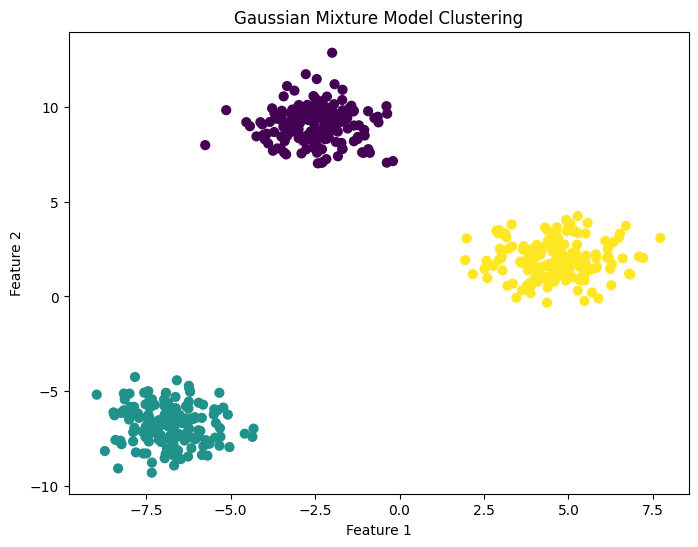

Weights of each mixture component: [0.334 0.332 0.334]
Means of each mixture component: [[-2.51336974  9.03492867]
 [-6.83120002 -6.75657544]
 [ 4.61416263  1.93184055]]
Covariances of each mixture component: [[[ 0.90129853 -0.01320113]
  [-0.01320113  0.95416819]]

 [[ 0.77515889 -0.09007485]
  [-0.09007485  1.03680033]]

 [[ 1.12983272  0.0239471 ]
  [ 0.0239471   0.93604854]]]


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture

n_samples = 500
n_features = 2
n_clusters = 3

X, y_true = make_blobs(n_samples=n_samples, centers=n_clusters, n_features=n_features, random_state=42)

gmm = GaussianMixture(n_components=n_clusters, random_state=42)
gmm.fit(X)
labels = gmm.predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis')
plt.title('Gaussian Mixture Model Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

print("Weights of each mixture component:", gmm.weights_)
print("Means of each mixture component:", gmm.means_)
print("Covariances of each mixture component:", gmm.covariances_)
